In [93]:
# import libraries
import numpy as np
import pandas as pd

from scipy import stats
from scipy.sparse import load_npz
import pickle

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [94]:
# import dataset
data = pd.read_pickle('drugsCom_data')

In [95]:
# import sparse matrix
from scipy.sparse import load_npz

term_matrix = load_npz('ngram_csr.npz')

# convert back to dataframe
term_matrix = pd.DataFrame(term_matrix.todense())

In [96]:
# import column headers for dataframe
import pickle

pickle_in = open('list.pickle', 'rb')
reviews_columns = pickle.load(pickle_in)

# add column headers back to dataframe
term_matrix.columns = reviews_columns

In [97]:
# add ratings back to the matrix to allow filtering
term_matrix['rating'] = data['rating']

In [98]:
term_matrix = term_matrix.dropna()

In [99]:
data.head()

,userID,drugName,condition,review,rating,date,usefulCount,character_count,word_count,clean_review
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,79,17,combination bystolic mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,741,141,son halfway fourth intuniv became concerned be...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,755,133,used another oral contraceptive pill cycle hap...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,448,89,first using form birth control glad went patch...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,719,134,suboxone completely turned life around feel he...


## Rating by Review Length

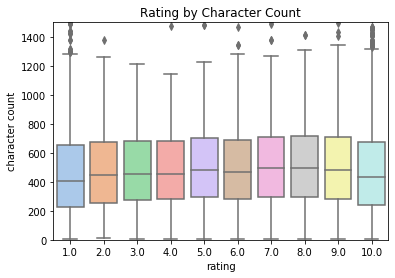

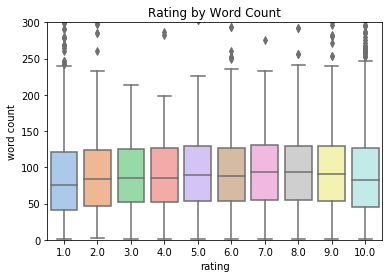

In [100]:
sns.set_palette('pastel')

# boxplot of character count vs. rating
_ = sns.boxplot(x='rating', y='character_count', data=data)
_ = plt.title('Rating by Character Count')
_ = plt.xlabel('rating')
_ = plt.ylabel('character count')
_ = plt.ylim(0,1500)
plt.show()

# boxplot of word count vs. rating
_ = sns.boxplot(x='rating', y='word_count', data=data)
_ = plt.title('Rating by Word Count')
_ = plt.xlabel('rating')
_ = plt.ylabel('word count')
_ = plt.ylim(0,300)
plt.show()

## T-test for Different Drug Names

In [108]:
# only include drugs that have at least 50 reviews
drug_names = data.drugName.unique()
drug_counts = np.array([(i, data.drugName[data.drugName == i].count()) for i in drug_names])
drug_names_50 = [i[0] for i in drug_counts if i[1] >= '50']

In [109]:
# create an array of ratings for each drug
drug_ratings = [(i, data[data.drugName == i].rating.values) for i in drug_names_50]

In [110]:
# calculate mean rating for each drug
drug_mean = [(i[0], np.mean(i[1])) for i in drug_ratings]

In [111]:
# set alpha for t-test
alpha = 0.05

# define function for t-test
def ttest(data, column, value):
    ''' Run t-test and return p-value.'''
    has = data[data[column] == value].rating
    has_not = data[data[column] != value].rating
    t, p = stats.ttest_ind(has, has_not)
    return p

In [162]:
# perform t-test on ratings with and without each drug
pvalue_drugs = [(i, ttest(data, 'drugName', i)) for i in drug_names_50]

# only include drugs with p-values below alpha
sig_pvalue_drugs = [(i[1], i[0]) for i in pvalue_drugs if float(i[1]) < alpha]

In [163]:
sig_pvalue_drugs

[(0.0074770883376673565, 'Valsartan'),
 (8.179008739503778e-05, 'Aripiprazole'),
 (0.0061419437646421365, 'Topiramate'),
 (0.0063281846760329125, 'L-methylfolate'),
 (8.535109944057316e-14, 'Liraglutide'),
 (0.000242958606121672, 'Trimethoprim'),
 (1.8753996332640938e-11, 'Amitriptyline'),
 (8.813007604634567e-17, 'Lamotrigine'),
 (1.0621811374162678e-07, 'Atripla'),
 (1.949702227354587e-93, 'Tioconazole'),
 (0.034886800726391665, 'Mobic'),
 (7.634204327125244e-45, 'Clonazepam'),
 (0.009686702723595944, 'Intuniv'),
 (9.685132818822061e-12, 'Drospirenone / ethinyl estradiol'),
 (0.005858650749604926, 'Prepopik'),
 (9.537477643161145e-14, 'Lo Loestrin Fe'),
 (6.065930149671325e-06, "Phillips' Milk of Magnesia"),
 (7.30960010473825e-05, 'Sronyx'),
 (9.564567229887031e-17, 'Monistat 7-Day Combination Pack'),
 (8.222851040881867e-56, 'Alprazolam'),
 (6.471519851178476e-08, 'Fluoxetine'),
 (9.919819369739045e-18, 'Brimonidine'),
 (7.245999699964766e-23, 'Isotretinoin'),
 (0.00029612654239530

## T-Test for Conditions

In [164]:
# only include conditions that have at least 50 reviews
condition_names = data.condition.unique()
condition_counts = np.array([(i, data.condition[data.condition == i].count()) for i in condition_names])
condition_names_50 = [i[0] for i in condition_counts if i[1] >= '50']

In [165]:
# create an array of ratings for each condition
condition_ratings = [(i, data[data.condition == i].rating.values) for i in condition_names_50]

In [166]:
# calculate mean rating for each drug
condition_mean = [(i[0], np.mean(i[1])) for i in condition_ratings]

In [167]:
# set alpha for t-test
alpha = 0.05

In [168]:
# perform t-test on ratings with and without each drug
pvalue_conditions = [(i, ttest(data, 'condition', i)) for i in drug_names_50]

# only include drugs with p-values below alpha
sig_pvalue_conditions = [i[0] for i in p_drugs if float(i[1]) < alpha]

NameError: name 'p_drugs' is not defined

In [ ]:
sig_pvalue_conditions

# Word Correlation

In [44]:
# create array of terms
terms = term_matrix.columns

In [46]:
# set alpha
alpha = 0.05

# define function for t-test
def ttest_term(data, term):
    ''' Run t-test on ratings with and without each term and return p-value.'''
    has = data[data[term] > 0].rating
    has_not = data[data[term] == 0].rating
    t, p = stats.ttest_ind(has, has_not)
    return p

In [47]:
# perform t-test on ratings with and without each term
pvalue_terms = [(i, ttest_term(term_matrix, i)) for i in terms]

# only include drugs with p-values below alpha
sig_pvalue_conditions = [i[0] for i in pvalue_terms if float(i[1]) < alpha]

In [69]:
sig_pvalue_conditions

['abated',
 'abnormal',
 'achey',
 'adapt',
 'adding',
 'advertised',
 'afford',
 'afrin',
 'afterwards',
 'agoraphobia',
 'alarming',
 'alert',
 'alesse',
 'allergen',
 'amlodipine',
 'angle',
 'ant',
 'apathetic',
 'app',
 'appt',
 'aspergers',
 'auditory',
 'autoimmune',
 'azo',
 'bang',
 'bat',
 'beautifully',
 'become',
 'biggie',
 'blemish',
 'blew',
 'blistering',
 'bloat',
 'blog',
 'blotch',
 'bored',
 'breathe',
 'brings',
 'broth',
 'butrans',
 'button',
 'call',
 'candidate',
 'capable',
 'care',
 'cash',
 'cease',
 'cessation',
 'chalked',
 'champix',
 'chemist',
 'chip',
 'chronic',
 'cider',
 'clockwork',
 'cognitive',
 'compared',
 'compressed',
 'conclusion',
 'consistently',
 'consists',
 'contributing',
 'core',
 'coworker',
 'cpap',
 'craving',
 'cute',
 'cyclen',
 'darvocet',
 'decade',
 'declined',
 'desperation',
 'detail',
 'deteriorating',
 'devil',
 'diarrhea',
 'diclegis',
 'diluted',
 'disappointment',
 'disorder',
 'disoriented',
 'dot',
 'dozen',
 'dramami